### What is Logistic Regression

Logistic Regression is a statistical model widely used for classification and predictive analytics. It's commonly applied when we want to estimate the probability of an event happening, like a vote being cast or not. The model evaluates a dataset of independent variables to make these predictions. The dependent variable is bounded between 0 and 1 because it represents a probability. Logistic regression transforms the odds (probability of success divided by failure) using a logit function.

The logistic regression equation looks like this:

$$Logit(pi) = 1/(1+ exp(-pi))

ln(pi/(1-pi)) = Beta_0 + Beta_1*X_1 + … + B_k*K_k$$

In this equation, $Logit(pi)$ is the dependent variable, $X$ is the independent variable, and $β$ represents coefficients estimated using maximum likelihood estimation (MLE). MLE optimizes these coefficients to maximize the log likelihood function.

### Interpreting Logistic Regression
Interpreting logistic regression involves understanding log odds, which can be challenging. To simplify, we often exponentiate beta estimates to get odds ratios (OR). An OR greater than 1 suggests higher odds of the outcome, while an OR less than 1 indicates lower odds. For instance, if the odds ratio for male survival on the Titanic is 0.0810, we'd interpret it as male survival odds decreasing by 0.0810 compared to females, holding other variables constant.

### Linear Regression vs Logistic Regression


Linear and logistic regressions are popular models in data science. Linear regression predicts a continuous dependent variable based on independent variables. Logistic regression, on the other hand, predicts a categorical variable. Linear regression produces a line of best fit, while logistic regression transforms an S-curve into a straight line.

Linear regression is generally easier to understand and requires a smaller sample size compared to logistic regression, which needs a more substantial sample for accurate predictions.

### Types of Logistic Regression

There are three types of logistic regression models based on the categorical response:

- <b>Binary Logistic Regression</b>: Predicts outcomes with two possibilities (e.g., spam or not spam).
- <b>Multinomial Logistic Regression</b>: Predicts outcomes with three or more unordered possibilities.
- <b>Ordinal Logistic Regression</b>: Predicts outcomes with three or more ordered possibilities (e.g., grading scales).


### Logistic Regression and Machine Learning


Logistic regression is a supervised machine learning model, specifically a discriminative one. It distinguishes between classes but doesn't generate information like a generative algorithm. In machine learning, negative log likelihood serves as the loss function, optimized using gradient descent to find the global maximum.

Regularization helps prevent overfitting, especially with a high number of predictor variables.


### Use cases of Logistic Regression

Logistic regression finds applications in various fields, some common ones are:

- <b>Fraud Detection</b>: Identifying data anomalies predictive of fraud.
- <b>Disease Prediction</b>: Predicting the likelihood of diseases for a given population.
- <b>Churn Prediction</b>: Anticipating behaviors indicative of leaving an organization or service.

### Sources
- <a href= 'https://www.ibm.com/topics/logistic-regression'>Link 1</a>
- <a href= 'https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc'>Link 2</a>
- <a href='https://www.spiceworks.com/tech/artificial-intelligence/articles/what-is-logistic-regression/'>Link 3</a>


In [19]:
# Import the neccessary Libraries
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load MNIST dataset
mnist = load_digits()
X = mnist.data
y = mnist.target

# Preprocess data --> split into 75% training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [2]:
# Implementation of Logistic Regression from scratch
# Implement Logistic Regression from scratch
class LogisticRegressionFromScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.theta = np.zeros(X.shape[1])
        for epoch in range(self.epochs):
            z = np.dot(X, self.theta)
            h = self.sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.learning_rate * gradient

    def predict(self, X):
        return np.round(self.sigmoid(np.dot(X, self.theta)))

In [3]:
# Train Logistic Regression model from scratch
model_scratch = LogisticRegressionFromScratch()   # call on the model, no parameters, meaning default values remain
model_scratch.fit(X_train, (y_train == 7).astype(int))  # Binary classification for digit 7

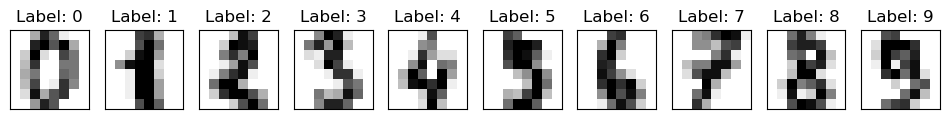

In [5]:
# Create a figure with 1 row and 10 columns of subplots
# Set the figure size to (12, 4) inches
# Remove the x and y ticks for each subplot
fig, axes = plt.subplots(1, 10, figsize=(12, 4), subplot_kw=dict(xticks=[], yticks=[]))

# Loop through each subplot in the 1x10 grid
for i, ax in enumerate(axes.flat):
    # Display the i-th image from the 'mnist' dataset in grayscale
    ax.imshow(mnist.images[i], cmap='gray_r')

    # Set the title of the subplot with the corresponding label from the 'mnist' dataset
    ax.set_title(f"Label: {mnist.target[i]}")

# Display the entire figure with all subplots
plt.show()


Text(0, 0.5, 'Feature 1')

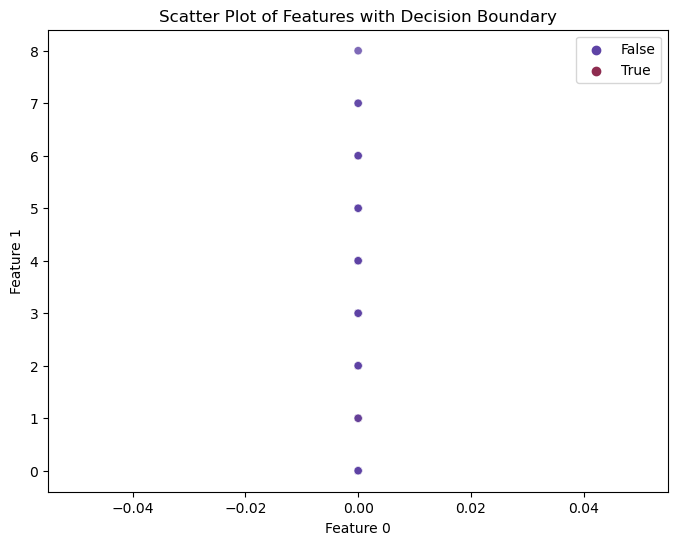

In [9]:
# Create a new figure with a specified size (8x6 inches)
plt.figure(figsize=(8, 6))

# Create a scatter plot using Seaborn, where X_train[:, 0] represents the x-coordinate,
# X_train[:, 1] represents the y-coordinate, and hue is set based on whether the corresponding y_train value is equal to 7
# Points with y_train == 7 will have a different color (using the 'viridis' color palette) than others
# Set alpha to 0.8 for some transparency
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=(y_train == 7), palette='twilight', alpha=0.8)   # choose a strong color palette like viridis or Twilight

# Set the title of the plot
plt.title('Scatter Plot of Features with Decision Boundary')

# Set the label for the x-axis
plt.xlabel('Feature 0')

# Set the label for the y-axis
plt.ylabel('Feature 1')


In [12]:
# Create an instance of the LogisticRegression model with a maximum of 1000 iterations
# Increasing max_iter allows the optimization algorithm more iterations to converge
model_prebuilt = LogisticRegression(max_iter=1000)

# Fit the logistic regression model to the training data
# The target variable is binary (y_train == 7), converted to integer using astype(int)
model_prebuilt.fit(X_train, (y_train == 7).astype(int))   # we first needed to convert the data into binary so that it can be trained on the model, now we checking for 7 using the trained model 


LogisticRegression(max_iter=1000)

In [13]:
# Evaluate and compare models
accuracy_scratch = np.mean(model_scratch.predict(X_test) == (y_test == 7))
accuracy_prebuilt = model_prebuilt.score(X_test, (y_test == 7).astype(int))

print(f"Accuracy (Logistic Regression from scratch): {accuracy_scratch}")   # the model from scratch performed slighly better compared to the prebuilt logistic regression model
print(f"Accuracy (Prebuilt Logistic Regression): {accuracy_prebuilt}")

Accuracy (Logistic Regression from scratch): 0.9933333333333333
Accuracy (Prebuilt Logistic Regression): 0.9911111111111112


We can also get a firsthand view of how the model performs each iteration to see the improvement within the 1000 epochs.

In [17]:
# Performance per iteration for the Logistic Regression from scratch
# Initialize an empty list to store accuracies per iteration
accuracy_per_iteration_scratch = []

# Train the model and collect accuracy for each iteration
model_scratch = LogisticRegressionFromScratch()
for epoch in range(1000):
    model_scratch.fit(X_train, (y_train == 7).astype(int))
    
    # Calculate accuracy for the current iteration and print it
    accuracy_scratch = np.mean(model_scratch.predict(X_test) == (y_test == 7))
    accuracy_per_iteration_scratch.append(accuracy_scratch)
    
    # Print accuracy for the current iteration
    print(f"Iteration {epoch + 1}: Accuracy (Logistic Regression from scratch): {accuracy_scratch}")

# Performance per iteration for the Prebuilt Logistic Regression
# Initialize an empty list to store accuracies per iteration
accuracy_per_iteration_prebuilt = []

# Train the model and collect accuracy for each iteration
model_prebuilt = LogisticRegression(max_iter=1000)  # having a 1000 iterations will not only take too long, but can lead to overfitting the data as well
for epoch in range(1000):
    model_prebuilt.fit(X_train, (y_train == 7).astype(int))
    
    # Calculate accuracy for the current iteration and print it
    accuracy_prebuilt = model_prebuilt.score(X_test, (y_test == 7).astype(int))
    accuracy_per_iteration_prebuilt.append(accuracy_prebuilt)
    
    # Print accuracy for the current iteration
    print(f"Iteration {epoch + 1}: Accuracy (Prebuilt Logistic Regression): {accuracy_prebuilt}")

# Note: This will take some time to finish executing

Iteration 1: Accuracy (Logistic Regression from scratch): 0.9933333333333333
Iteration 2: Accuracy (Logistic Regression from scratch): 0.9933333333333333
Iteration 3: Accuracy (Logistic Regression from scratch): 0.9933333333333333
Iteration 4: Accuracy (Logistic Regression from scratch): 0.9933333333333333
Iteration 5: Accuracy (Logistic Regression from scratch): 0.9933333333333333
Iteration 6: Accuracy (Logistic Regression from scratch): 0.9933333333333333
Iteration 7: Accuracy (Logistic Regression from scratch): 0.9933333333333333
Iteration 8: Accuracy (Logistic Regression from scratch): 0.9933333333333333
Iteration 9: Accuracy (Logistic Regression from scratch): 0.9933333333333333
Iteration 10: Accuracy (Logistic Regression from scratch): 0.9933333333333333
Iteration 11: Accuracy (Logistic Regression from scratch): 0.9933333333333333
Iteration 12: Accuracy (Logistic Regression from scratch): 0.9933333333333333
Iteration 13: Accuracy (Logistic Regression from scratch): 0.993333333333

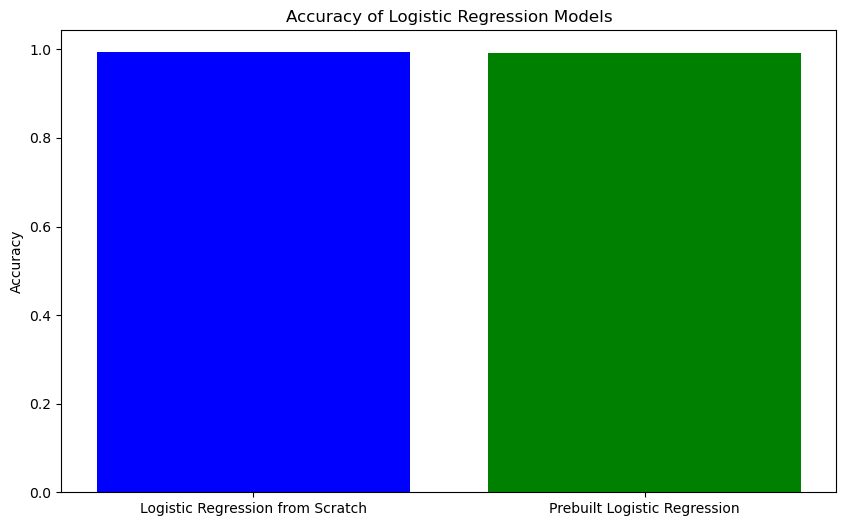

In [20]:
# plot the results
# Create a bar graph to show the accuracy of both models
plt.figure(figsize=(10, 6))
models = ['Logistic Regression from Scratch', 'Prebuilt Logistic Regression']
accuracies = [accuracy_scratch, accuracy_prebuilt]
plt.bar(models, accuracies, color=['blue', 'green'])
plt.title('Accuracy of Logistic Regression Models')
plt.ylabel('Accuracy')
plt.show()